In [11]:
import pandas as pd
from linearmodels import PooledOLS, PanelOLS, RandomEffects
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf



In [12]:
data = pd.read_excel('ldv_assignment.xlsx')
data.head()

,Age,Female,Fail,Work_Experience,English,Country_Code,PG_Degree,Agrade,BelowBGrade,Year2004,Year2005,Year2006,Year2007
0,22,1,0,0,0,10,0,0,0,0,0,0,0
1,24,0,1,0,1,8,0,0,0,0,0,0,0
2,28,0,0,0,1,10,0,0,0,0,0,0,0
3,23,0,0,0,1,8,0,0,0,0,0,0,0
4,23,0,0,1,1,8,0,0,0,0,0,0,0


How many students failed? Percentage failed.

12.76% chance that they will fail.

In [13]:
sum(np.where(data['Fail']==1,1,0))/len(data.index)

0.134

Model

In [14]:
formula = 'Fail ~ Age + English + Female + Work_Experience + Agrade\
+ BelowBGrade + PG_Degree + Year2004 + Year2005 + Year2006\
+Year2007'

In [15]:
#logit regression
mod = smf.logit(formula, data)
res = mod.fit(cov_type='HC1')#white robustness
print(res.summary())

#uses  maxmium likeliehood

Optimization terminated successfully.
         Current function value: 0.359433
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Fail   No. Observations:                  500
Model:                          Logit   Df Residuals:                      488
Method:                           MLE   Df Model:                           11
Date:                Sat, 03 Dec 2022   Pseudo R-squ.:                 0.08755
Time:                        16:23:40   Log-Likelihood:                -179.72
converged:                       True   LL-Null:                       -196.96
Covariance Type:                  HC1   LLR p-value:                 0.0003010
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2564      1.220     -1.849      0.064      -4.648       0.135
Age           

In [16]:
#probit model
mod = smf.probit(formula, data)
res = mod.fit(cov_type='HC1')
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.358913
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                   Fail   No. Observations:                  500
Model:                         Probit   Df Residuals:                      488
Method:                           MLE   Df Model:                           11
Date:                Sat, 03 Dec 2022   Pseudo R-squ.:                 0.08887
Time:                        16:23:42   Log-Likelihood:                -179.46
converged:                       True   LL-Null:                       -196.96
Covariance Type:                  HC1   LLR p-value:                 0.0002471
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2872      0.610     -2.112      0.035      -2.482      -0.093
Age           

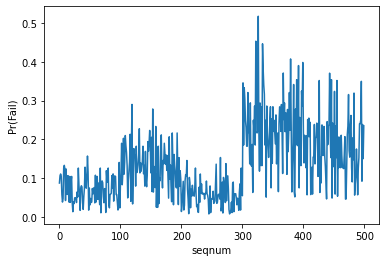

In [17]:
plt.figure(1)
plt.plot(res.predict())
plt.ylabel('Pr(Fail)')
plt.xlabel('seqnum')
plt.show()

In [18]:
#what is the change in the probablity 
print(res.get_margeff().summary()) #marginal effects

       Probit Marginal Effects       
Dep. Variable:                   Fail
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0011      0.004      0.252      0.801      -0.008       0.010
English            -0.0185      0.031     -0.601      0.548      -0.079       0.042
Female             -0.0382      0.037     -1.040      0.298      -0.110       0.034
Work_Experience    -0.0627      0.030     -2.101      0.036      -0.121      -0.004
Agrade             -0.1061      0.045     -2.342      0.019      -0.195      -0.017
BelowBGrade         0.0673      0.043      1.561      0.119      -0.017       0.152
PG_Degree           0.0262      0.044      0.588      0.556      -0.061       0.113
Year2004            0.0689      0.048      1.445      0.149      -0.025       0.162
Year2005

probablity of failing with work experience drops 6.98 percent